# Health Insurance Dataset
### Objective
-  Supervised Learning (Binary Classification problem). Predict whether the policyholders (customers) from the previous year will also be interested in Vehicle Insurance provided by the company.


## 1. DATA COLLECTION 
- Collect the data from kaggle with CSV format

## 2. EXPLORATORY DATA ANALYSIS & DATA CLEANING
- Statiscial summary on numerical features and objects 
- Dataset shape
- Datatypes (numerical, categorical)
- Categorical (ordinal and nominal)
- Pearson Correlation
- Target values visualization 
- Plot Distribution 
- Check for Imbalanced Dataset

## 3. FEATURE ENGINEERING
- Find outliers
- Fill Missing Values 
- Binary Classification Problem 
- Ordinal and Label Encode
- If model is tree based method (Decesion Tree, Random Forest, XGBoost), no scaling is needed 


## 4. FEATURE SELECTION
- Dropping low variance features 
- Information Gain-Mutual Information in Classification Problems
- Pearson Correlation 
- Fisher Score-ChiSquare Test for Feature Selection
- Tree-based Selection using ExtraTreesClassifier (Feature Importance)
- Univariate Selection 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab
from pprint import pprint
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss

# DATA COLLECTION 
- importing files as csv 


In [2]:
train = pd.read_csv('../inputs/train.csv')
test = pd.read_csv('../inputs/test.csv')
sample = pd.read_csv('../inputs/sample_submission.csv')
print(f'Training shape: {train.shape}, Testing Shape: {test.shape}, Sample Shape: {sample.shape}')

Training shape: (381109, 12), Testing Shape: (127037, 11), Sample Shape: (127037, 2)


In [3]:
# define the index id and join test with sample dataframe
test = test.set_index('id').join(sample.set_index('id'))
df = train.set_index('id')
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


# EXPLORATORY DATA ANALYSIS & DATA CLEANING
- Statiscial summary on numerical features and objects 
- Dataset shape
- Datatypes (numerical, categorical)
- Categorical (ordinal and nominal)
- Pearson Correlation
- Target values visualization 
- Plot Distribution 
- Check for Imbalanced Dataset

In [4]:
df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'num_null_values'}))
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
datatype,object,int64,int64,float64,int64,object,object,float64,float64,int64,int64
num_null_values,0,0,0,0,0,0,0,0,0,0,0
pct_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# explore the shape (rows and columns) for dataframe
print(f'Number of rows of DataFrame: {df.shape[0]}')
print(f'Number of columns of DataFrame: {df.shape[1]}')

Number of rows of DataFrame: 381109
Number of columns of DataFrame: 11


In [6]:
features = df.columns
numerical_feat = [features for features in df.columns if df[features].dtypes != 'O']
print(f'Number of Numerical Features: {len(numerical_feat)}')

categorical_feat = [features for features in df.columns if df[features].dtypes == 'O']
print(f'Number of Categorical Features: {len(categorical_feat)}')

Number of Numerical Features: 8
Number of Categorical Features: 3


In [7]:
pprint(df.columns.to_series().groupby(df.dtypes).groups)

{dtype('int64'): Index(['Age', 'Driving_License', 'Previously_Insured', 'Vintage', 'Response'], dtype='object'),
 dtype('float64'): Index(['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel'], dtype='object'),
 dtype('O'): Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')}


In [8]:
# statisical summary for quantitative columns 
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
# statistical summary of object dtypes columns (categorical)
df.describe(include=[np.object])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [10]:
pct_response = (df.Response.value_counts()[1] /  df.Response.value_counts()[0]) *100
print(f'Percentage of Customers that are Interested {pct_response:0.2f}%')

Percentage of Customers that are Interested 13.97%


In [11]:
def plot_distribution(df, feature):
	plt.figure(figsize=(25,6))
	# first row, 1st column
	plt.subplot(1, 3, 1)
	sns.distplot(df[feature])
	# first row, 2 column
	plt.subplot(1, 3, 2)
	stats.probplot(df[feature], dist='norm', plot=pylab)
 
	plt.subplot(1, 3, 3)
	plt.boxplot(df[feature], vert=False)
	plt.show()

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


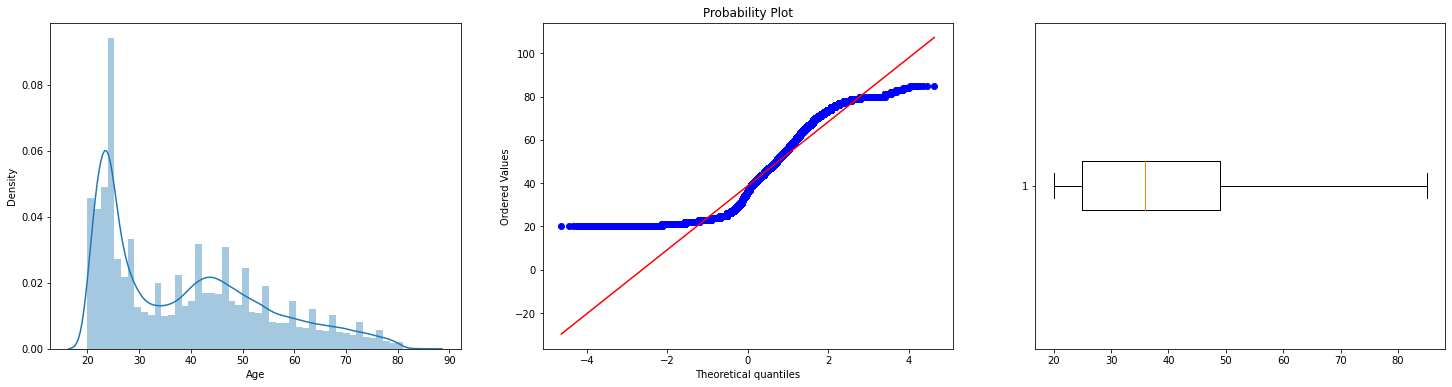

In [12]:
plot_distribution(df, 'Age')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


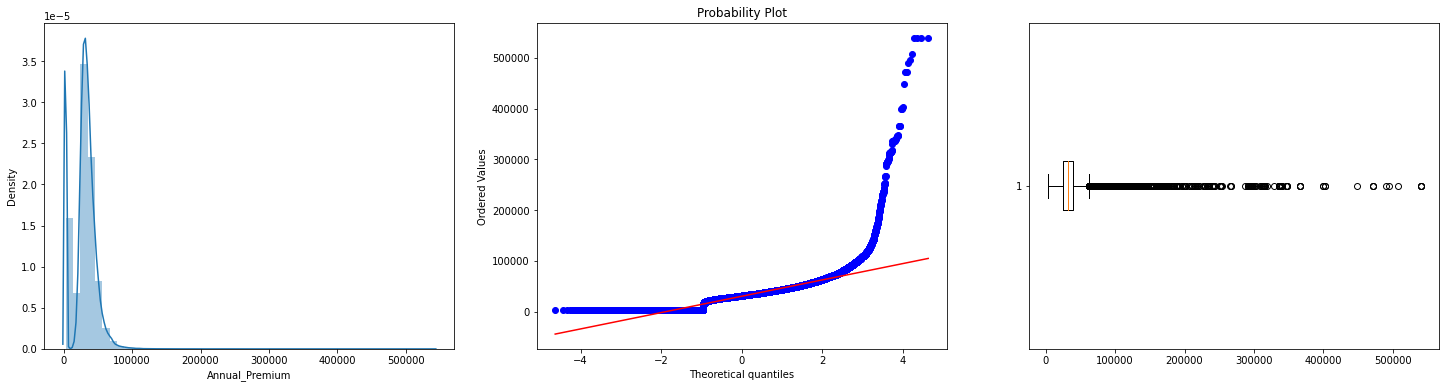

30564.389581458323


In [13]:
# Annual Premium has outliers as shown in the boxplot 
plot_distribution(df, 'Annual_Premium')
print(df.Annual_Premium.mean())

<AxesSubplot:title={'center':'Count of Interest or Not'}, xlabel='Response', ylabel='count'>

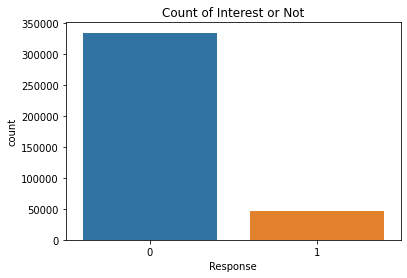

In [14]:
# 1 : Customer is interested, 0 : Customer is not interested
plt.title("Count of Interest or Not")
sns.countplot(x = "Response", data=df)

<AxesSubplot:title={'center':'Response based on Vehicle Damage'}, xlabel='Response', ylabel='count'>

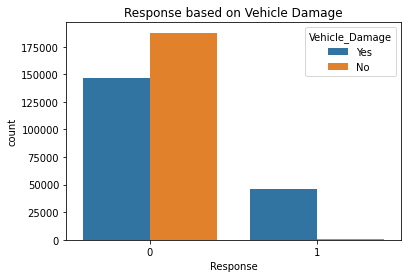

In [15]:

plt.title("Response based on Vehicle Damage")
sns.countplot(x = "Response", hue = 'Vehicle_Damage', data=df)
# Customer with their vehicle damaged in the past tend to be interested

<AxesSubplot:title={'center':'Response based on Previosly Insured'}, xlabel='Response', ylabel='count'>

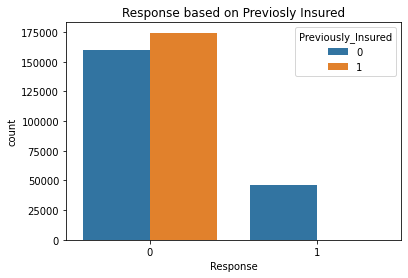

In [16]:
plt.title("Response based on Previosly Insured")
sns.countplot(x = "Response", hue = 'Previously_Insured', data=df)

<AxesSubplot:title={'center':'Response based on Vehicle Age'}, xlabel='Response', ylabel='count'>

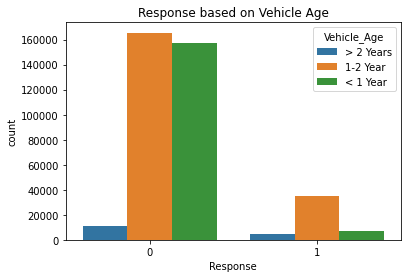

In [17]:
plt.title("Response based on Vehicle Age")
sns.countplot(x = "Response", hue = 'Vehicle_Age', data=df)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Response based on Gender Category'}, xlabel='Gender', ylabel='count'>

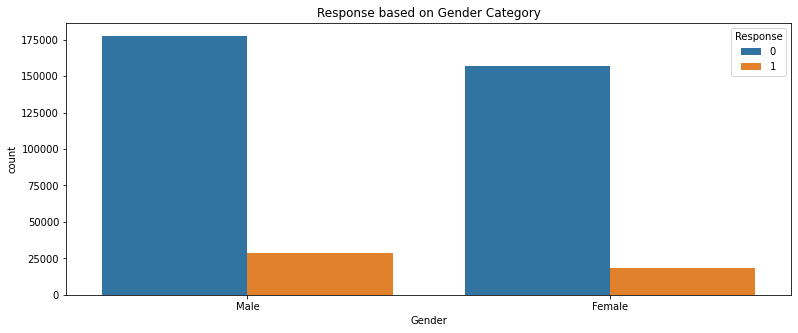

In [18]:
plt.figure(figsize = (13,5))
plt.title("Response based on Gender Category")
sns.countplot(df['Gender'], hue = df['Response'])

<AxesSubplot:>

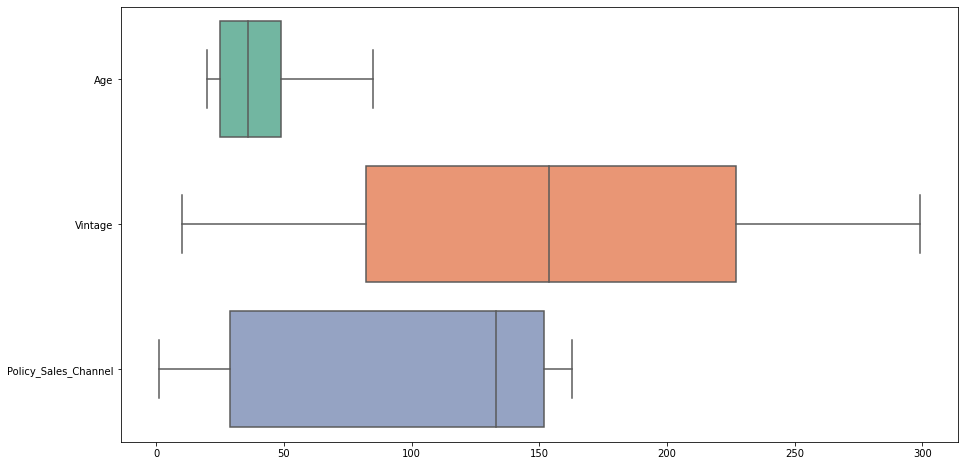

In [19]:
null_col = ['Age', 'Vintage','Policy_Sales_Channel']
plt.subplots(figsize=(15,8))
sns.boxplot(data=df[null_col], orient="h", palette="Set2")
# no outliers found 

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

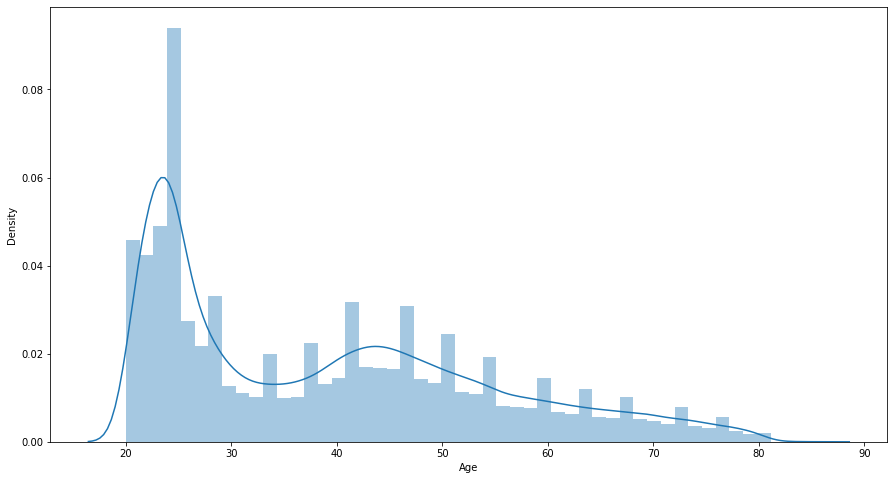

In [20]:
plt.subplots(figsize=(15,8))
sns.distplot(df.Age)

<AxesSubplot:>

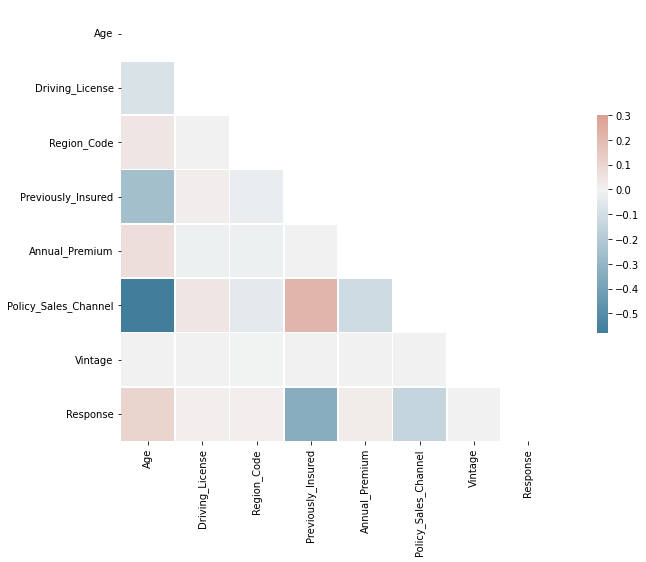

In [21]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plt heatmap with mask and ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Policy Sales Channel has a high correlation with Age, relative to other features

# FEATURE ENGINEERING
- Find outliers
- Fill Missing Values 
- Binary Classification Problem 
- Ordinal and Label Encode
- If model is tree based method (Decesion Tree, Random Forest, XGBoost), no scaling is needed 


In [22]:
# get each categorical features
# get each class name 
cat_features = df[['Gender', 'Vehicle_Age', 'Vehicle_Damage']]

# printing unique values of each column
for col in cat_features.columns:
    print(f"{col}: {cat_features[col].unique()}")

Gender: ['Male' 'Female']
Vehicle_Age: ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage: ['Yes' 'No']


## Nominal and Ordinal 

In [23]:
nominal_col = ['Gender', 'Vehicle_Damage']
df[nominal_col] = df[nominal_col].apply(LabelEncoder().fit_transform)

In [24]:
vehicle_age_map = {'< 1 Year':1, '1-2 Year':2, '> 2 Years':3}
df['Vehicle_Age'] = df.Vehicle_Age.map(vehicle_age_map)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


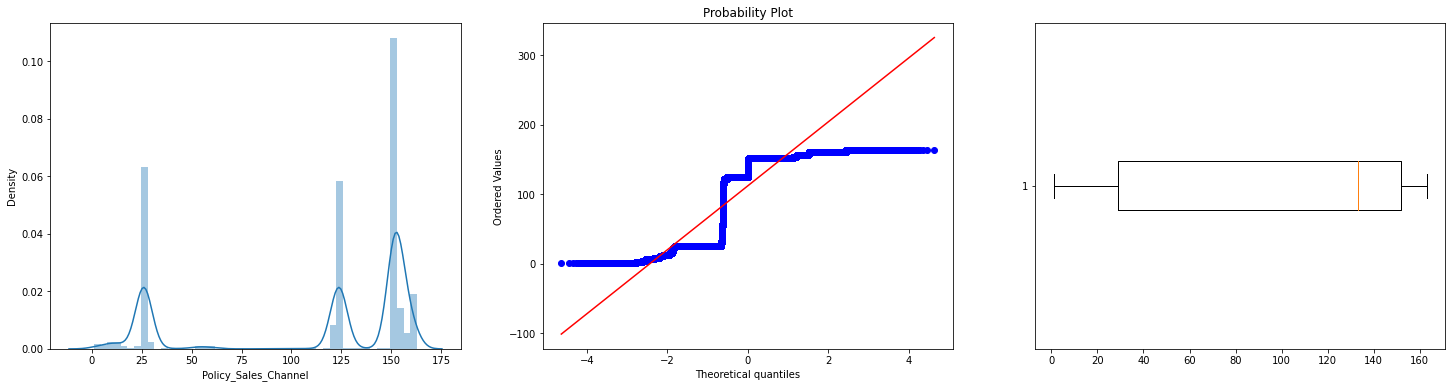

In [25]:
# Annual Premium has outliers as shown in the boxplot 
plot_distribution(df, 'Policy_Sales_Channel')

In [26]:
replacements = {
    'int64': 'int',
    'float64': 'float'
}
col_str = ", ".join('{} {}'.format(n,d) for (n,d) in zip(df.columns, df.dtypes.replace(replacements)))

In [27]:
df_cleaned = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_cleaned = df_cleaned.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'num_null_values'}))
df_cleaned = df_cleaned.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_cleaned

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
datatype,int64,int64,int64,float64,int64,int64,int64,float64,float64,int64,int64
num_null_values,0,0,0,0,0,0,0,0,0,0,0
pct_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Detect Outliers 

<AxesSubplot:>

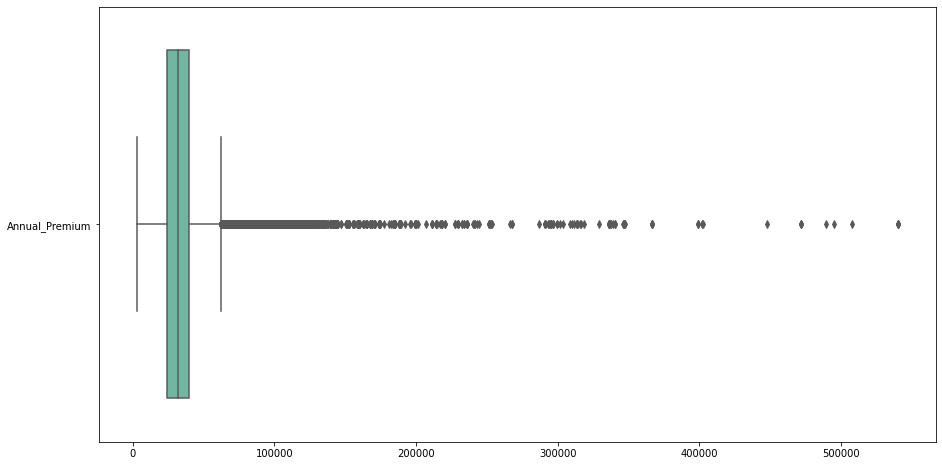

In [28]:
plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['Annual_Premium']], orient="h", palette="Set2")

In [29]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df.Annual_Premium))
#only keep rows in dataframe with all z-scores less than absolute value of 3 
df.Annual_Premium = df.Annual_Premium[(z<3)]
df.dropna(inplace=True)

<AxesSubplot:>

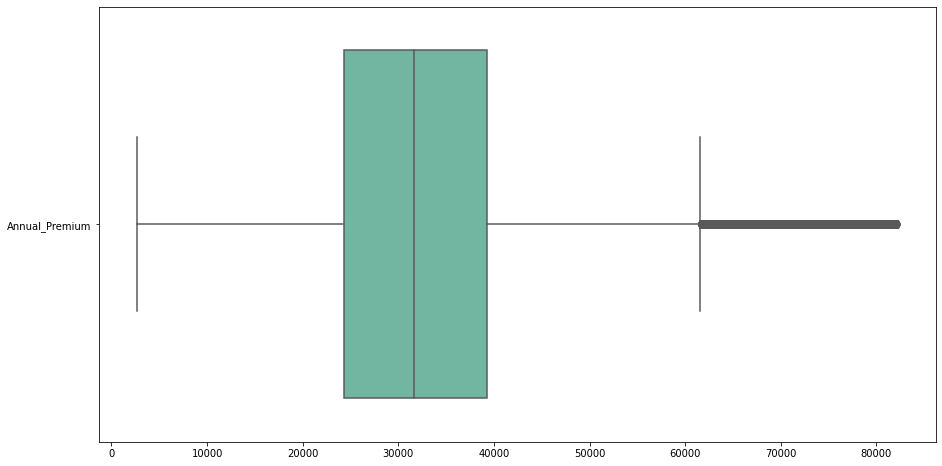

In [30]:
plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['Annual_Premium']], orient="h", palette="Set2")

# FEATURE SELECTION
- Dropping low variance features 5%>
- Information Gain-Mutual Information in Classification Problems
- Pearson Correlation 
- Fisher Score-ChiSquare Test for Feature Selection
- Tree-based Selection using ExtraTreesClassifier (Feature Importance)
- Univariate Selection 

<AxesSubplot:>

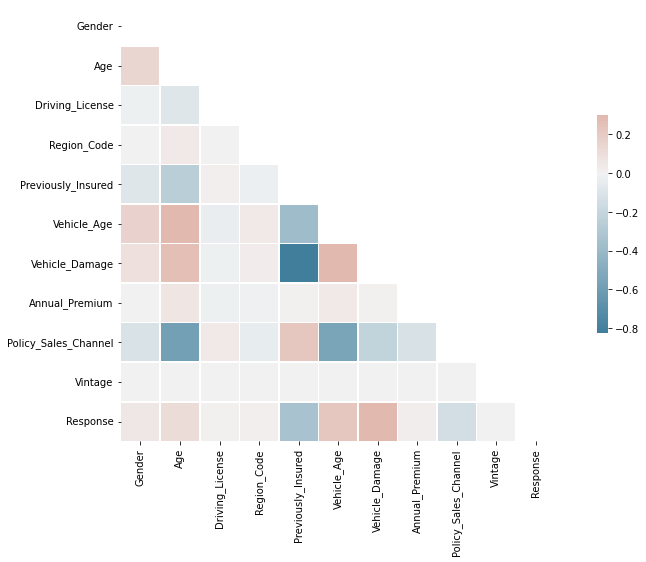

In [31]:
# compute corr array and generate a mask for the upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plt heatmap with mask and ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
var_threshold = VarianceThreshold(threshold=0.05)
var_threshold.fit(df)

# get the number of feature coumns with 0 variance 
constant_col = [col for col in df.columns if col not in df.columns[var_threshold.get_support()]]
# drop feature with 0 variance (constanct features) 
print(constant_col)
df.drop(constant_col, axis=1, inplace=True)

['Driving_License']


In [33]:
targets = df.Response
features = df.drop('Response', axis=1)

<AxesSubplot:>

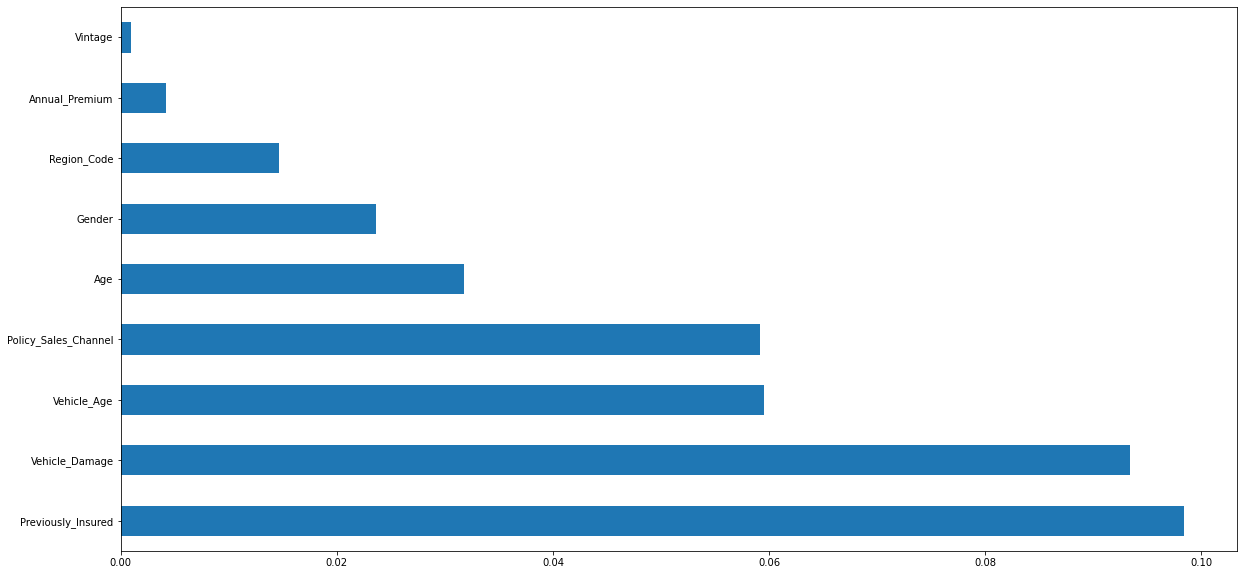

In [34]:
# determine the mutual information for classification 
# output a value between [0,1], the higher the value the more dependent on target values
mutual_info = mutual_info_classif(features, targets)
# convert into series and get column names 
mutual_info = pd.Series(mutual_info)
mutual_info.index = features.columns

# plot ordered mutual_info values per feature 
mutual_info.sort_values(ascending=False).plot(kind='barh', figsize=(20,10))

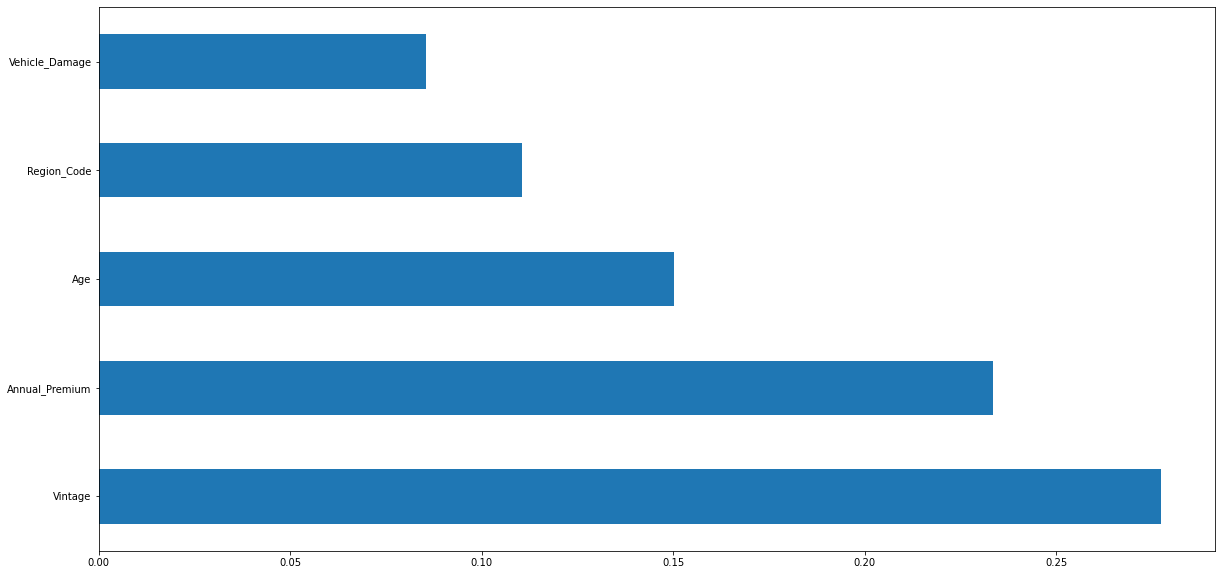

In [35]:
model = ExtraTreesClassifier()
model.fit(features, targets)

# plot the feature importance
feat_importance = pd.Series(model.feature_importances_, index = features.columns)
feat_importance.nlargest(5).plot(kind='barh', figsize=(20,10))
plt.show()

<AxesSubplot:>

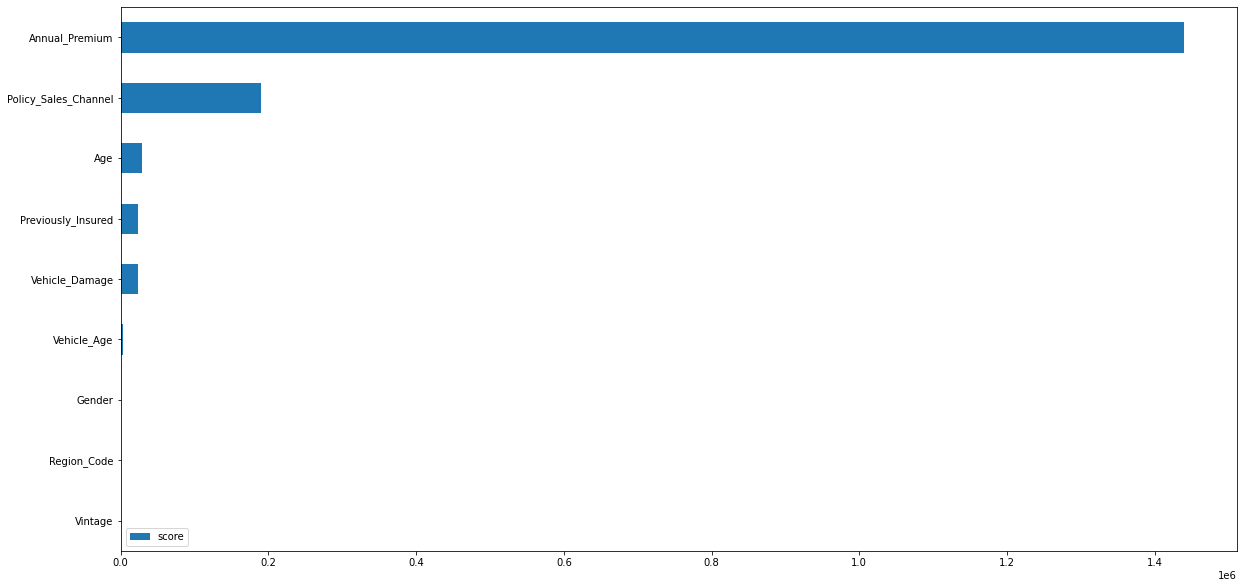

In [36]:
# get top 5 features using Chi2
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(features, targets) 

# get a dataframe of score and column names
df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(features.columns)

# concat borth dataframes
feat_scores = pd.concat([df_col, df_scores], axis=1)
feat_scores.columns = ['features', 'score']
feat_scores.index = features.columns
feat_scores.sort_values(by='score').plot(kind='barh', figsize=(20,10))

In [37]:
df.to_csv('../inputs/health_insurance_clean.csv', index=False)

# IMBALANCED DATASET 

### 14% of target values are interested

# How to deal with Imbalanced Dataset 
- Stratified KFold

In [38]:
pct_response = (df.Response.value_counts()[1] /  df.Response.value_counts()[0]) *100
print(f'Percentage of Customers that are Interested {pct_response:0.2f}%')

Percentage of Customers that are Interested 13.95%


In [39]:
## Get interested and not_interested count values
interested = df[df['Response']==1]
not_interested = df[df['Response']==0]
print(interested.shape)
print(not_interested.shape)

targets = df['Response']
features = df.drop('Response', axis=1)

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
features_res, targets_res = nm.fit_resample(features,targets)

(46388, 10)
(332638, 10)


In [41]:
print(f'Original dataset shape {Counter(targets)}')
print(f'Resampled dataset shape {Counter(targets_res)}')

Original dataset shape Counter({0: 332638, 1: 46388})
Resampled dataset shape Counter({0: 46388, 1: 46388})
